# Allen Institute
## 03_feat_select
---
## Dataset
- `../data/m1_10x_ml/train_whole_log.pkl`

## WorkFlow
- Hyperparameter tuning
 
 **Notes)**
 
 if kernel dies during running codes, you can ommit completed sections indexed if alphabets

In [1]:
import os
import json
from typing import NamedTuple, Dict, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tools.figure import cns_subtype_markers, fig_kwarg

In [2]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = pd.read_pickle(
        "../data/m1_10x_ml/train_whole_log.pkl"
    )
    label: pd.core.frame.DataFrame = pd.read_csv(
        "../data/m1_10x_meta/metadata.csv", index_col=0
    ).class_label
    save_dir: str = "../out/m1_10x/03_feat_select"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False

In [3]:
conf = Config(save_file=True)

In [4]:
os.makedirs(conf.save_dir, exist_ok=True)

---
## Feature engineering

In [5]:
df_group = conf.data.loc[
    :,
    conf.data.max() > 0
].assign(
    label=conf.label.loc[conf.data.index]
).groupby("label")

In [6]:
df_group.mean()

,WASH7P,LOC105379213,LOC729737,LOC100996442,LOC102725121,LOC102723897,LOC102723917,LOC105379431,LOC100134822,LOC105378947,...,ATP8,ATP6,COX3,TRNG,ND3,ND4L,ND4,ND5,ND6,CYTB
label,,,,,,,,,,,,,,,,,,,,,
GABAergic,0.083258,0.012731,0.045816,0.005155,0.000000,0.290032,0.471626,0.032262,0.018127,0.016158,...,0.142051,6.355261,8.044991,0.000000,4.334019,0.974209,6.927412,3.048575,0.153978,6.898323
Glutamatergic,0.136517,0.015665,0.177908,0.006054,0.000000,0.354561,0.918127,0.047111,0.036365,0.009205,...,0.113817,6.613485,7.851784,0.001754,4.546677,0.975255,6.870272,3.085305,0.131715,7.165904
Non-Neuronal,0.045991,0.001890,0.002904,0.000000,0.002566,0.061094,0.080392,0.005079,0.016756,0.009842,...,0.035976,3.230230,4.177210,0.000000,2.209517,0.320189,3.282492,0.894674,0.047321,3.646743


In [7]:
args = lambda data: dict(
    bins=np.ceil(np.sqrt(len(data))).astype(int),
    grid=False,
    color=".2",
    alpha=0.3,
    edgecolor=".2"
)

In [8]:
data = pd.DataFrame(
    df_group.mean(),
    index=df_group.mean().index,
    columns=df_group.mean().columns
).std().sort_values(ascending=False)

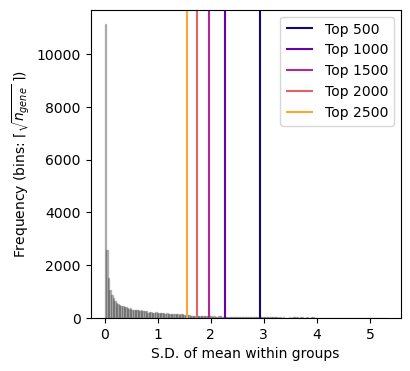

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

data.hist(**args(data))

ylim = ax.get_ylim()

for i, v in enumerate(np.arange(500, 3000, 500)):
    ax.vlines(
        data.iloc[v], ymin=0,
        ymax=ylim[1],
        color=plt.cm.plasma(i/5),
        label=f"Top {v}"
    )
    
ax.set_ylim(*ylim)
ax.legend();

ax.set(
    xlabel="S.D. of mean within groups",
    ylabel="Frequency (bins: $\lceil\sqrt{n_{gene}}\;\\rceil$)",
    title=""
);

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/hist.png", **conf.fig_kwarg)

In [10]:
genes = [
    "DCX", "NEUROD6", "CALB2", "LHX6", "SIX3",
    "VIM", "ALDH1L1", "OLIG2", "PDGFRA", "AIF1",
    "ASCL1", "NES", "PECAM1", "IGFBP7", "KRT14"
]

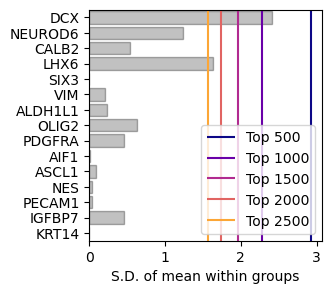

In [11]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.barplot(
    x=data.loc[genes],
    y=genes,
    orient="h", color=".2", edgecolor="k", alpha=0.3
)

ylim = ax.get_ylim()

for i, v in enumerate(np.arange(500, 3000, 500)):
    ax.vlines(
        data.iloc[v], ymin=ylim[1],
        ymax=ylim[0],
        color=plt.cm.plasma(i/5),
        label=f"Top {v}"
    )
    
ax.set_ylim(*ylim)
ax.legend();

ax.set(
    xlabel="S.D. of mean within groups",
    title=""
);

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/bar.png", **conf.fig_kwarg)

In [12]:
top = 1000

In [13]:
df_feat = conf.data.loc[:, data.iloc[:top].index]
df_feat.index.name = "$\log_2(RPM+1)$"

In [14]:
df_feat.head()

,FGF14,ROBO2,CCSER1,FRMPD4,OPCML,DLGAP1,KCNQ5,GRIN2B,FGF12,RIMS2,...,NOS1AP,DZIP3,FGFR1OP,LPCAT4,LRRN3,MROH1,IGSF21,LRP2,TTC7B,SEC14L5
$\log_2(RPM+1)$,,,,,,,,,,,,,,,,,,,,,
TCACTCGTCACCCATC-LKTX_190130_01_B01,11.261327,0.000000,11.405661,9.761709,12.319481,13.219629,11.405661,10.835603,11.974000,10.356305,...,5.244036,6.224876,4.281611,6.224876,0.000000,7.023940,5.244036,0.0,6.542941,4.281611
GTGTGGCGTTACCCTC-LKTX_190130_01_H01,12.340805,13.434984,11.989409,10.454030,11.301570,12.989232,10.302141,10.132359,10.939163,12.038307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.141329,0.000000
AACCATGCAATTTCCT-LKTX_190129_01_A01,10.498212,11.497714,10.294830,10.005579,11.535176,12.226868,9.573111,9.894660,11.757499,10.108576,...,6.268129,5.286727,6.268129,0.000000,6.846838,6.846838,6.268129,0.0,6.268129,0.000000
CTCAGAAGTTAGGCCC-LKTX_190130_01_A01,12.472519,12.681938,10.865356,10.865356,11.116771,11.472773,0.000000,8.476322,10.280780,10.721048,...,8.797439,8.062634,0.000000,0.000000,0.000000,0.000000,7.480367,0.0,7.480367,0.000000
AACGAAACAGAGTCAG-LKTX_190129_01_A01,11.347013,12.388548,10.134749,9.376645,11.628685,12.674254,8.485419,10.719284,11.782967,10.674916,...,5.702017,7.268384,0.000000,7.681080,5.702017,7.268384,0.000000,0.0,8.263698,0.000000


---
## Export

In [15]:
df_feat.to_csv(f"../data/m1_10x_ml/train_top{top}_log.csv", index=True)
df_feat.to_pickle(f"../data/m1_10x_ml/train_top{top}_log.pkl")

In [16]:
df_test = pd.read_pickle(f"../data/m1_10x_ml/test_whole_log.pkl")

df_test.loc[:, df_feat.columns].to_csv(f"../data/m1_10x_ml/test_top{top}_log.csv", index=True)
df_test.loc[:, df_feat.columns].to_pickle(f"../data/m1_10x_ml/test_top{top}_log.pkl")